In [1]:
import os
import sys
current = os.path.dirname(os.path.realpath("Visualize_Rosetta_Neurons.ipynb"))
parent = os.path.dirname(current)
sys.path.append(parent)
from transformers import CLIPProcessor, CLIPModel
import torch
import torch.hub
import torchvision
from torchvision.models import resnet50
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import clip
from PIL import Image
import requests
import torch.hub
import time
import pickle
import math
from functools import reduce
from match_utils import matching, stats, proggan, nethook, dataset, loading, plotting, layers, models, visualize_rosetta, universal

2023-03-03 07:13:03.973701: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Please install taming transformers from here: https://github.com/CompVis/taming-transformers.git


In [2]:
device = torch.device('cuda:6')

In [5]:
universal_matches = universal.get_universal_activations("results/horses/stylegan_resnet50",
                          "results/horses/stylegan_mae",
                          "results/horses/stylegan_dino", 
                          "results/horses/stylegan_dinovitb16",
                          "results/horses/stylegan_clip",
                           device = device, n = 5)

Loading...
Done
Loading...
Done
Loading...
Done
Loading...
Done
Loading...
Done


# Models

In [3]:
gan, gan_layers = models.load_gan("stylegan2-lsun_horse", device)

In [4]:
resnet50, resnet50_layers = models.load_discr("resnet50", device)
mae, mae_layers = models.load_discr("mae", device)
dino, dino_layers = models.load_discr("dino", device)
dinovit, dinovit_layers = models.load_discr("dino_vitb16", device)
clip, clip_layers = models.load_discr("clip", device)

Using cache found in /home/amil/.cache/torch/hub/facebookresearch_dino_main
Using cache found in /home/amil/.cache/torch/hub/facebookresearch_dino_main


# Visualize

In [23]:
batch_size = 1
epochs = 1
classidx = None
z_dataset, c_dataset = dataset.create_dataset(gan, "stylegan2-lsun_horse", batch_size, epochs, classidx, device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


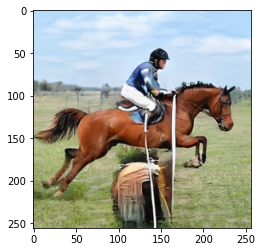

In [24]:
img, _ = gan([z_dataset],0.7, c_dataset)
img = (img+1)/2
img = torch.permute(img[0], (1,2,0))
plt.imshow(img.detach().cpu())

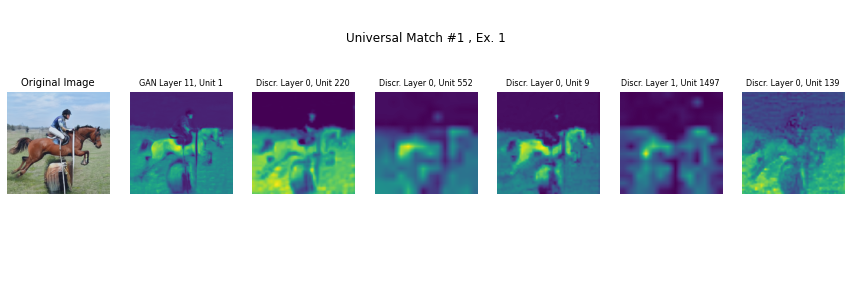

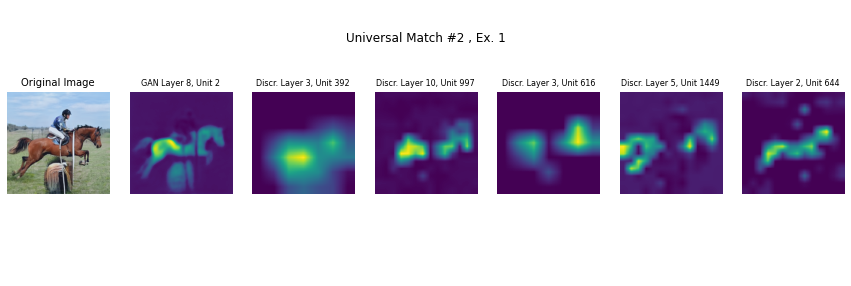

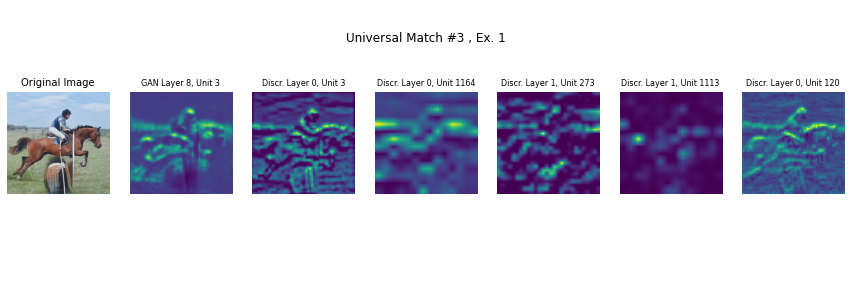

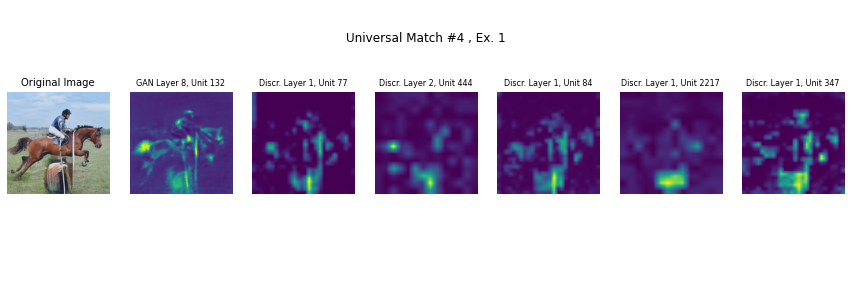

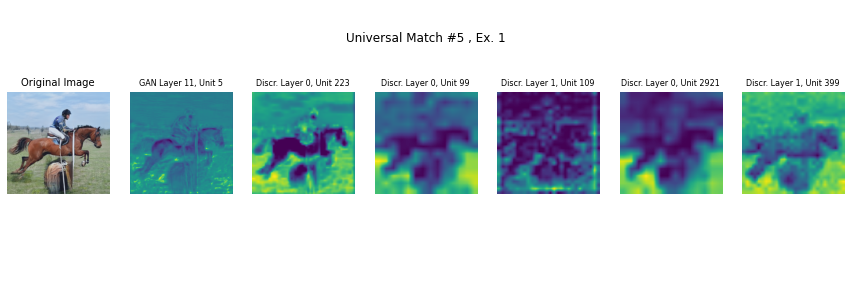

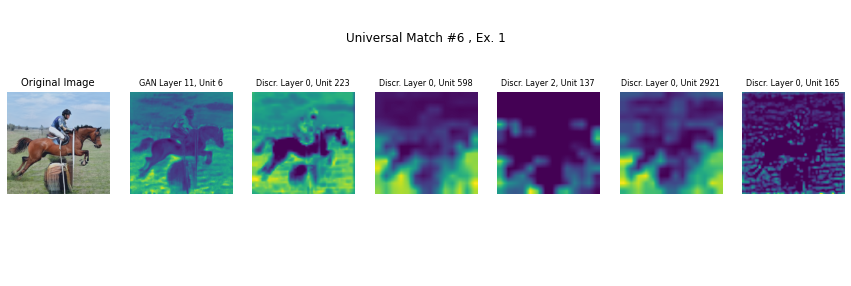

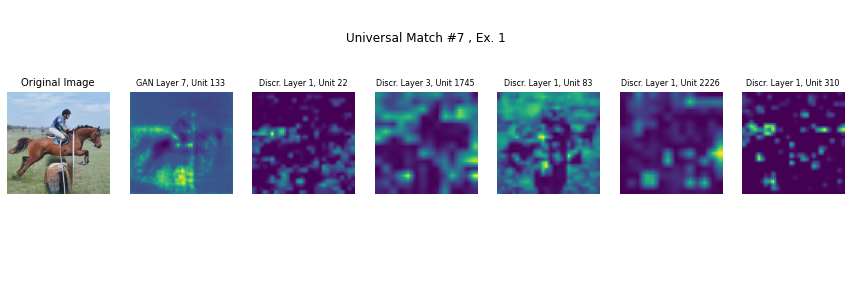

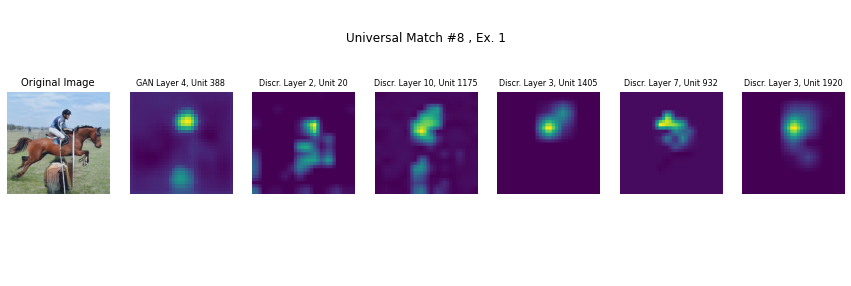

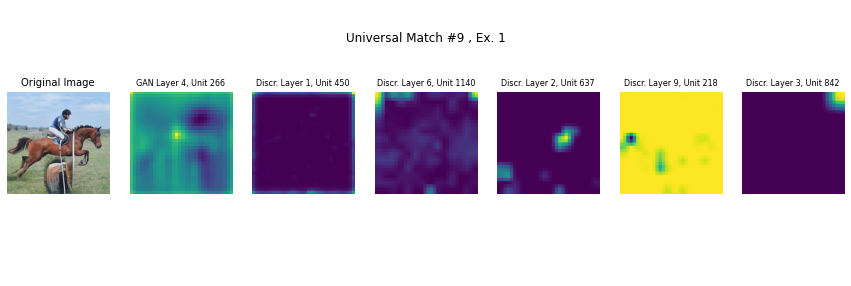

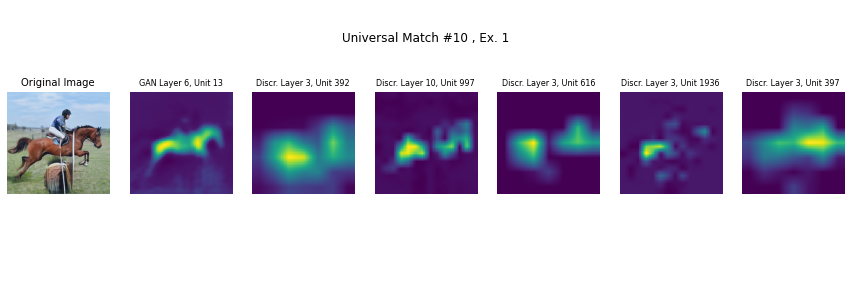

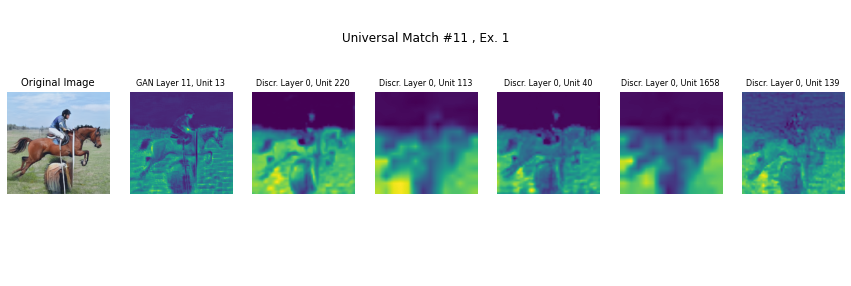

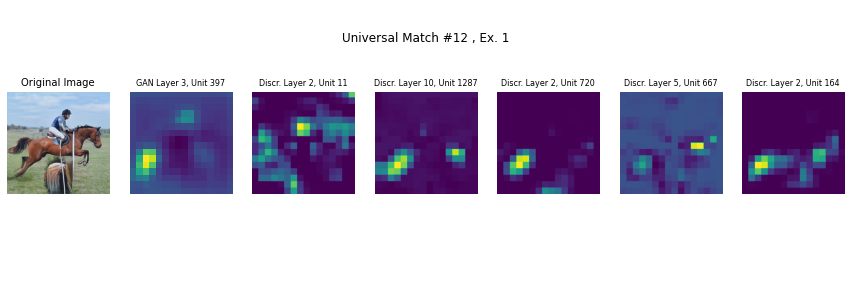

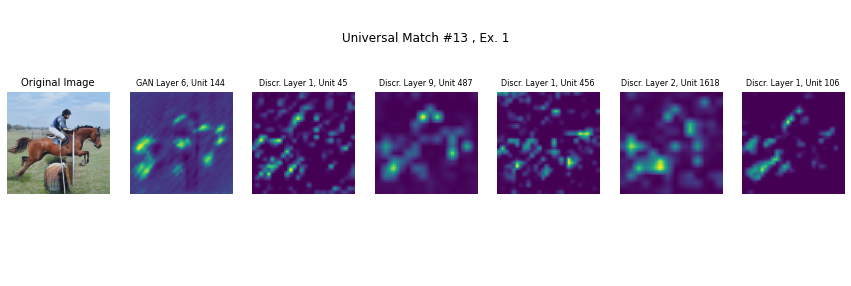

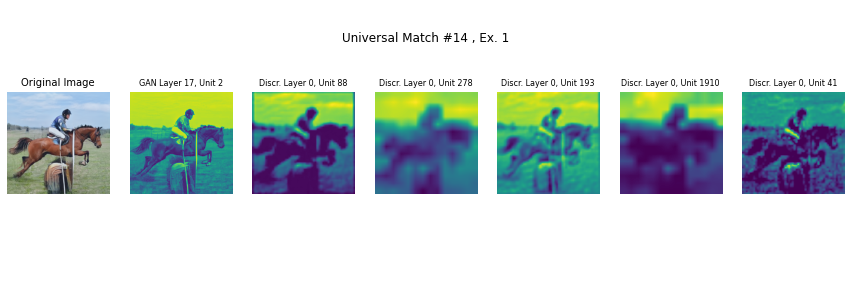

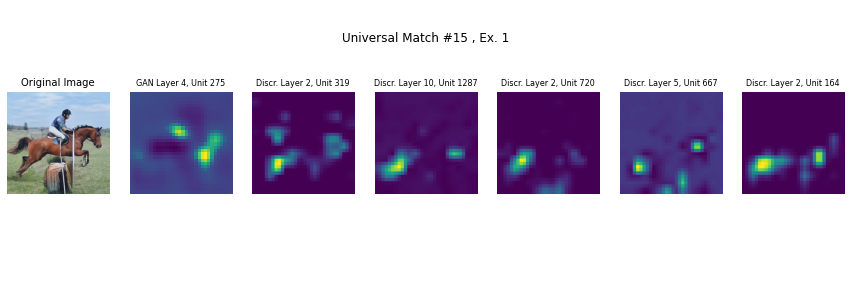

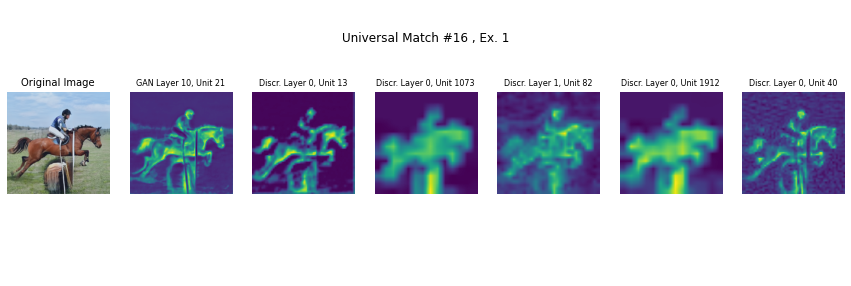

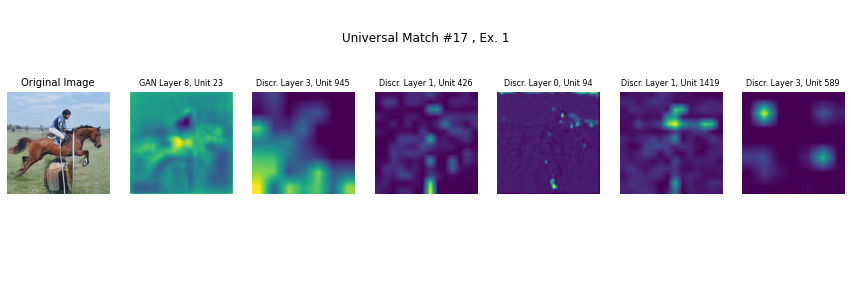

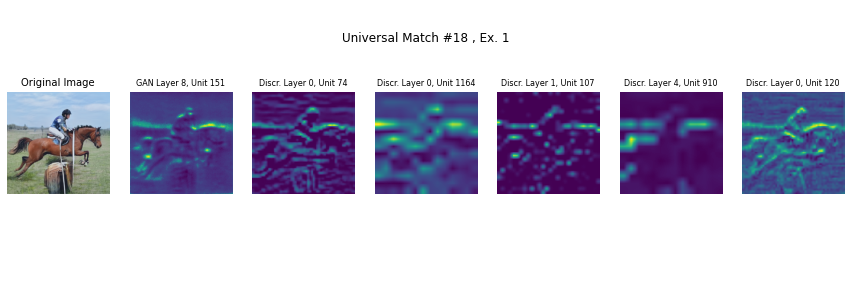

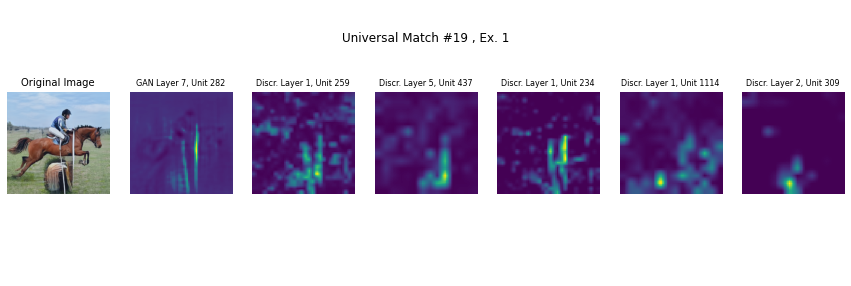

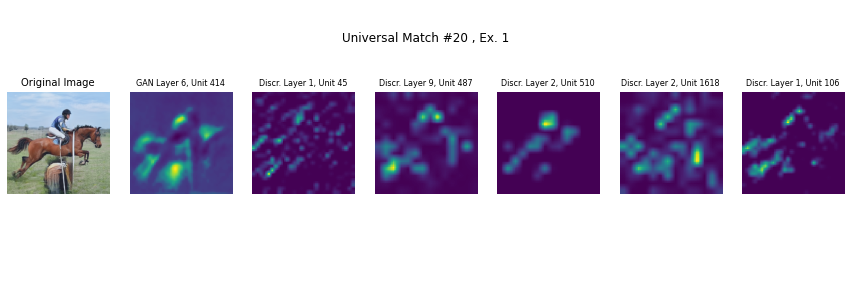

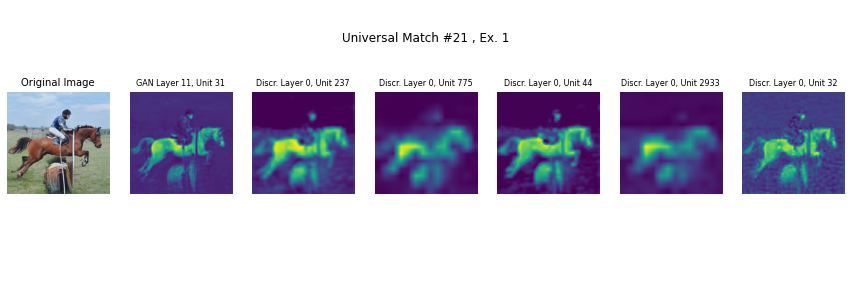

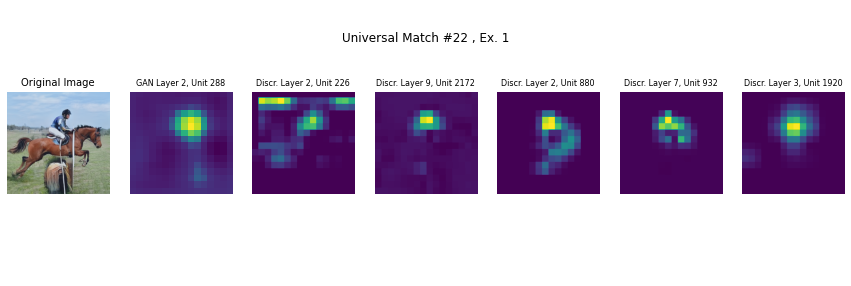

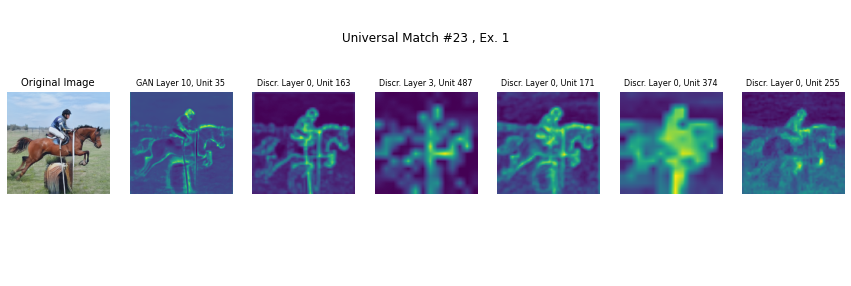

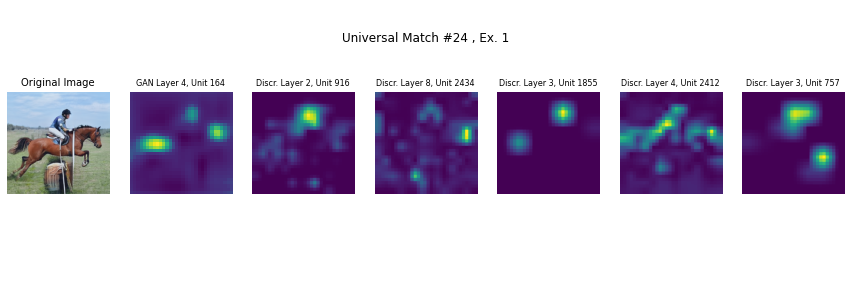

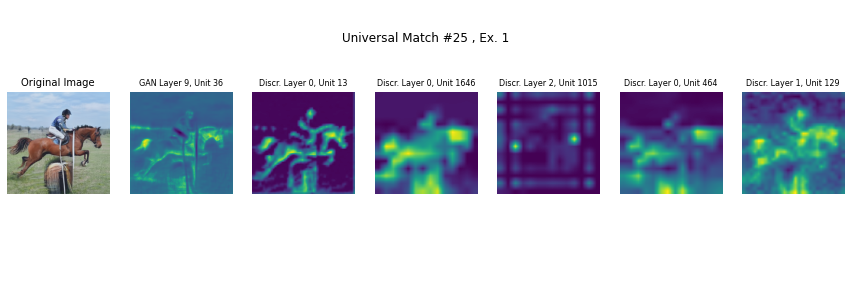

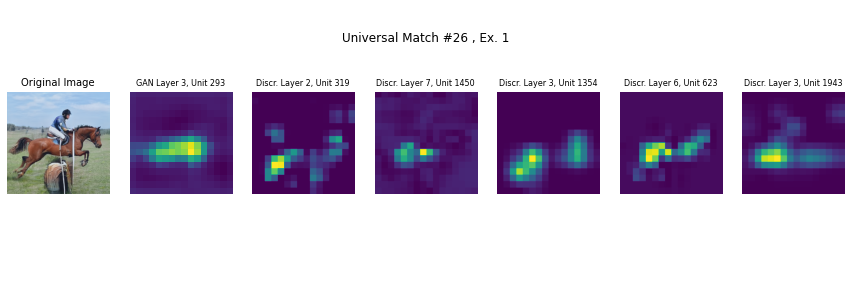

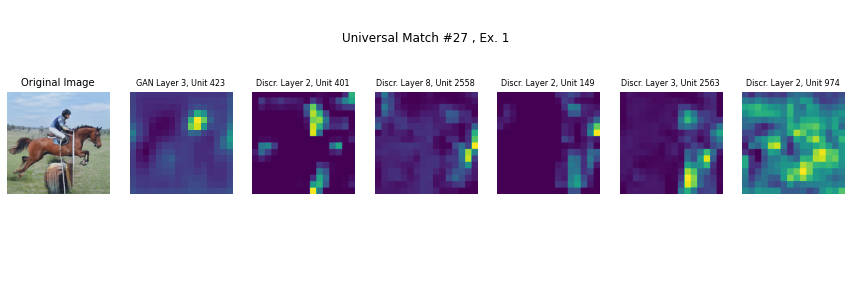

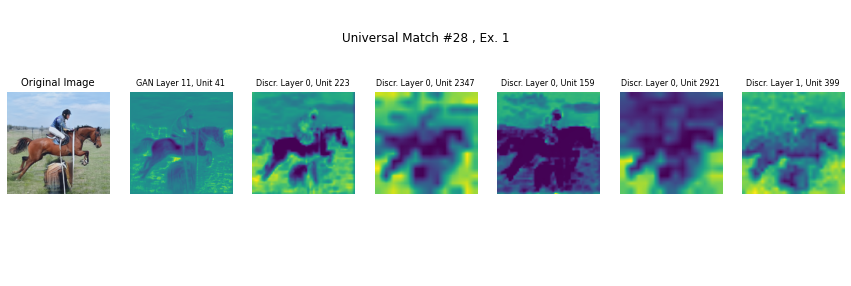

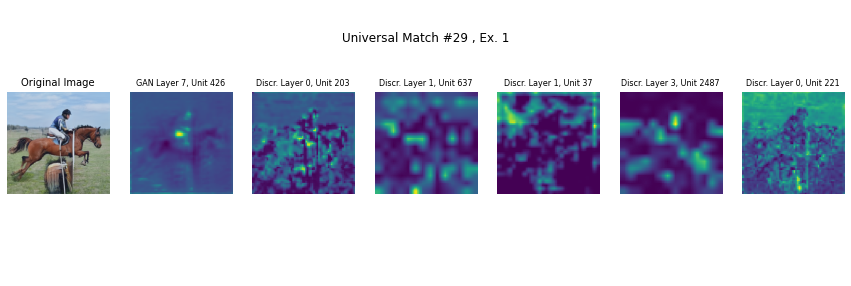

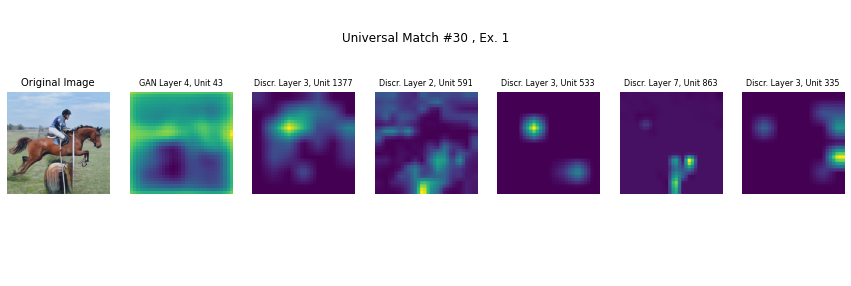

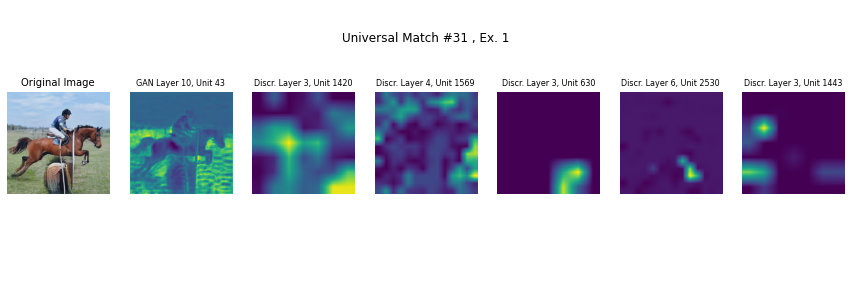

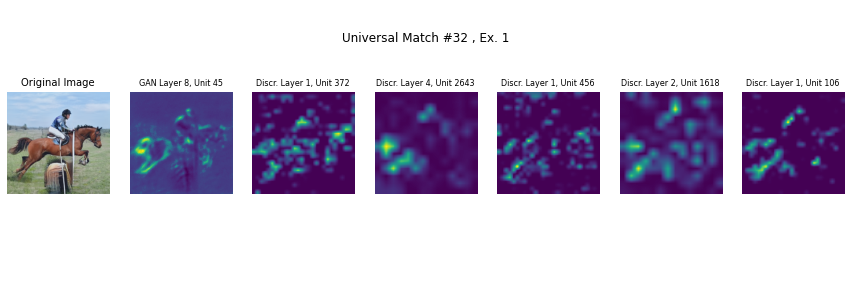

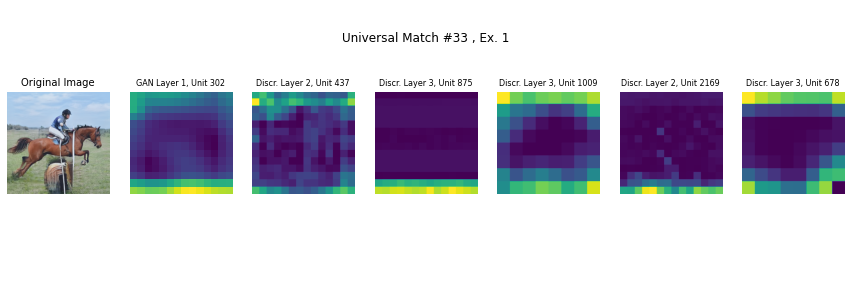

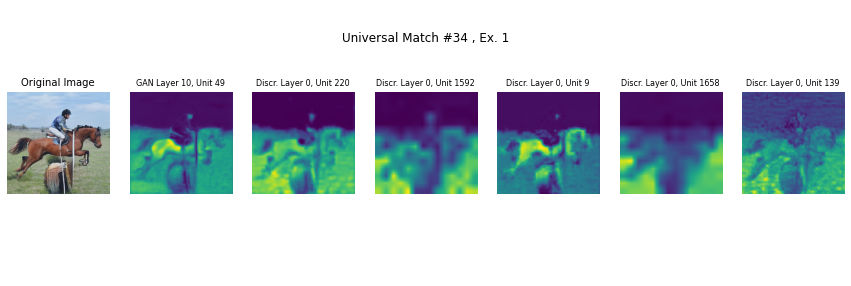

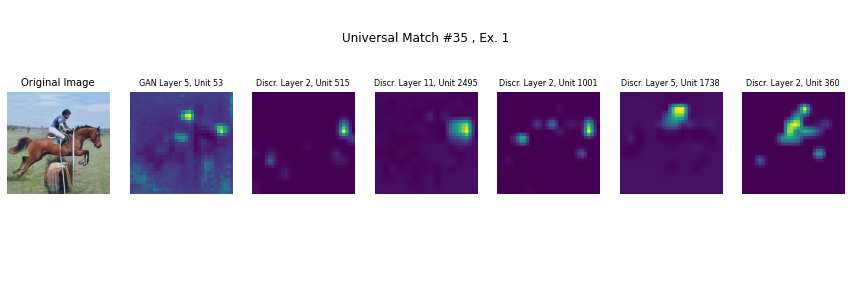

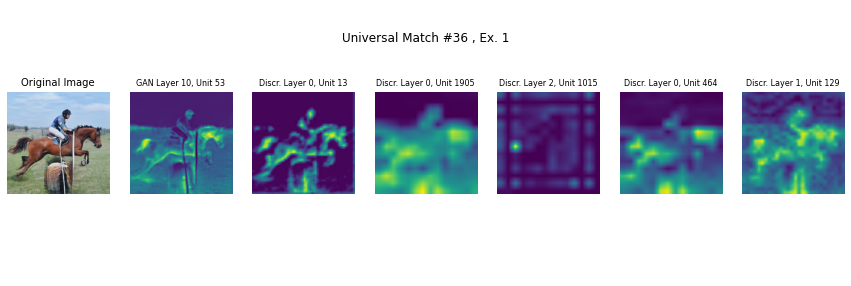

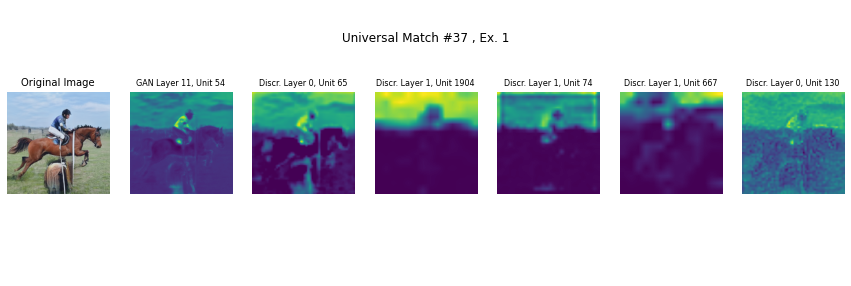

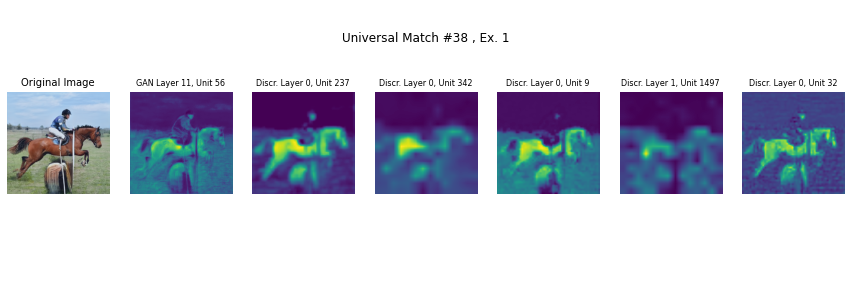

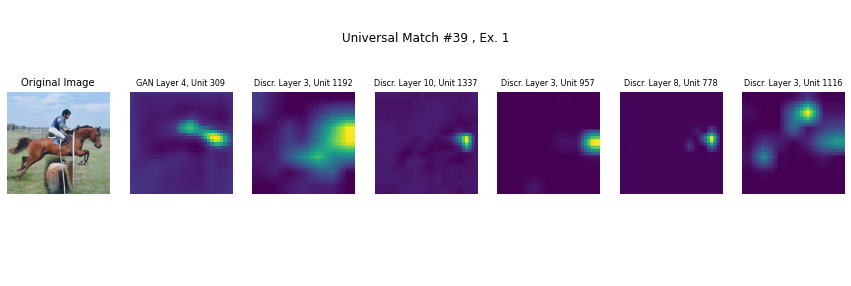

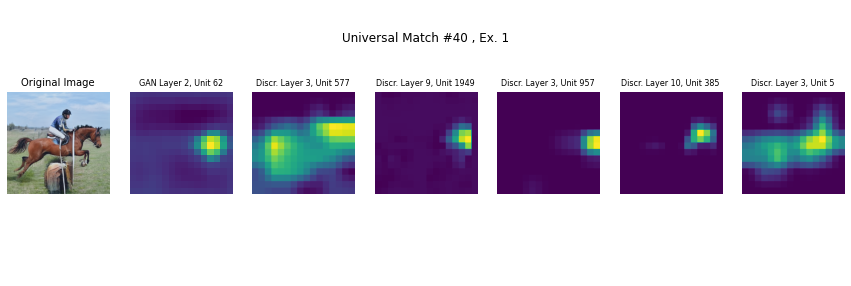

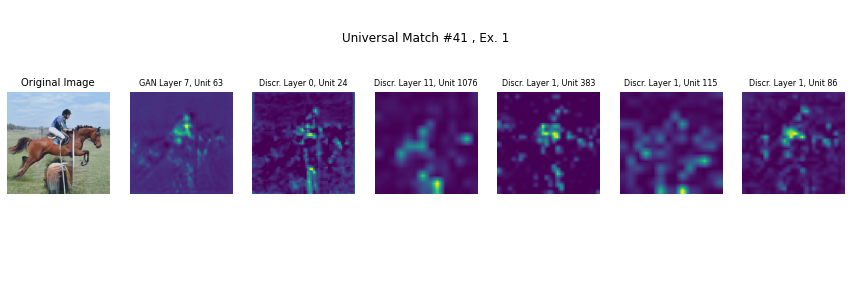

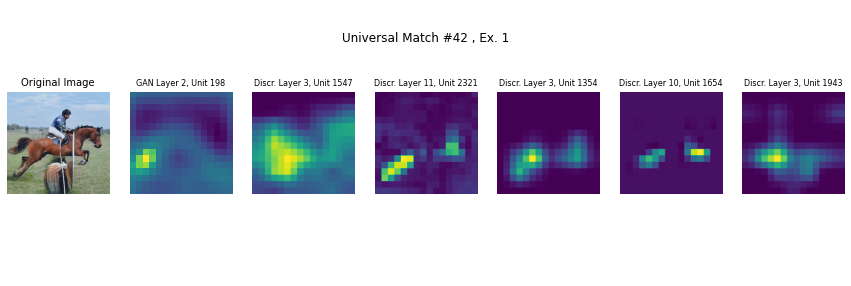

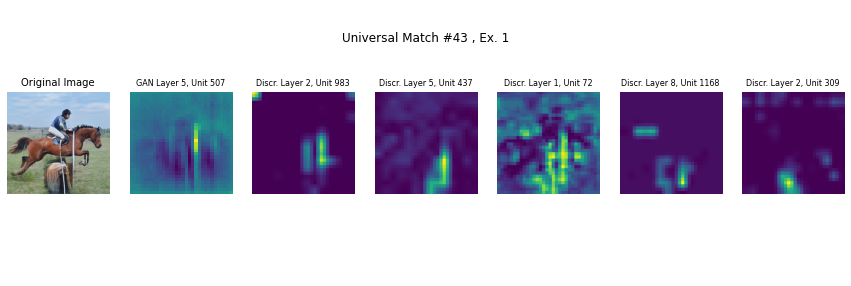

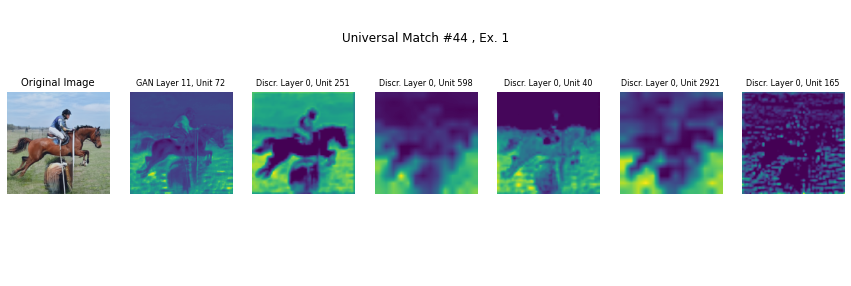

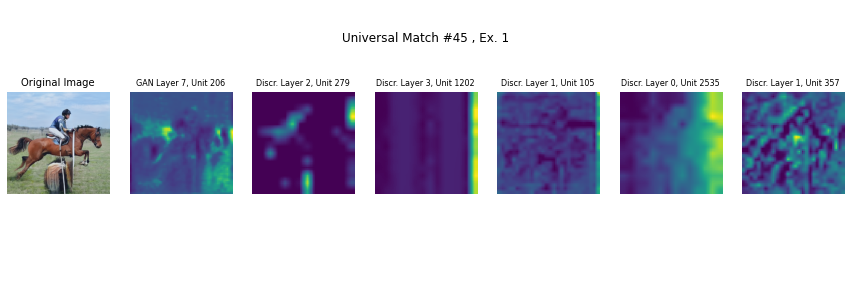

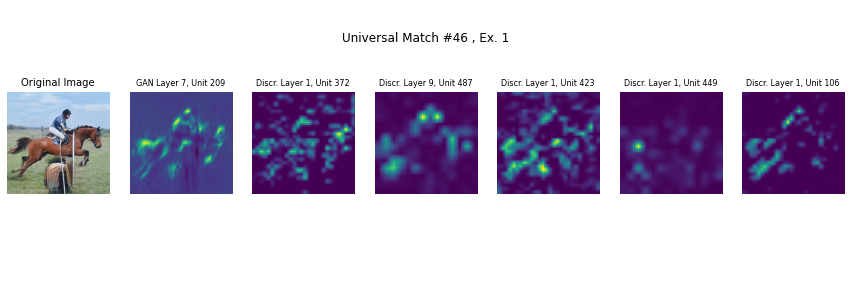

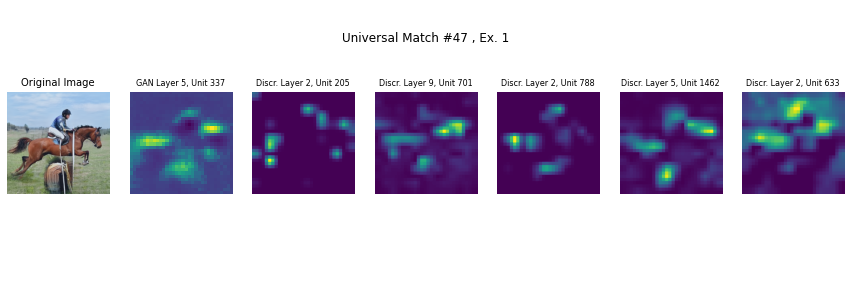

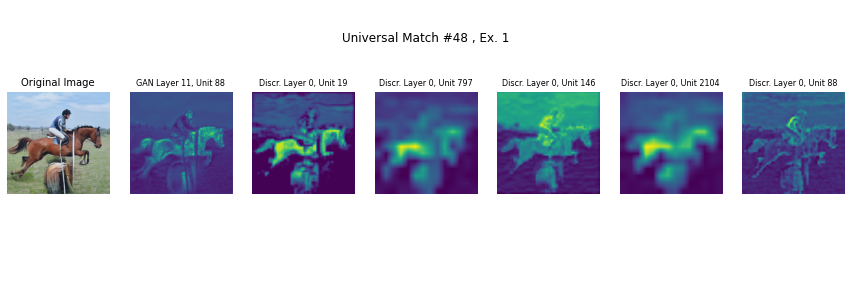

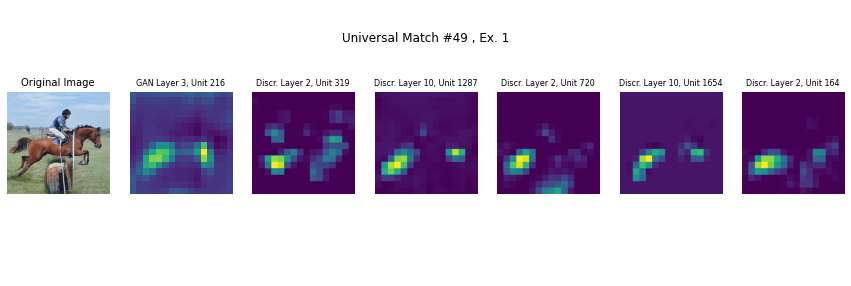

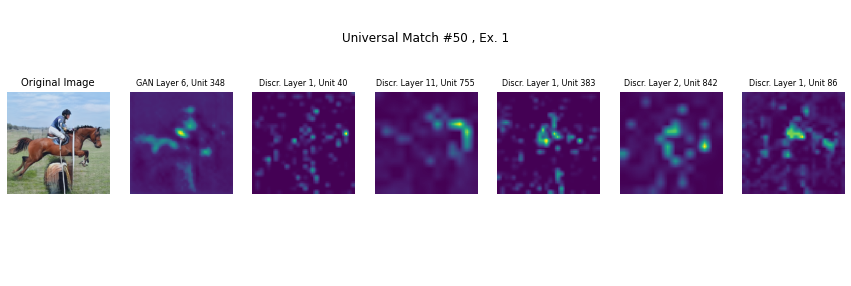

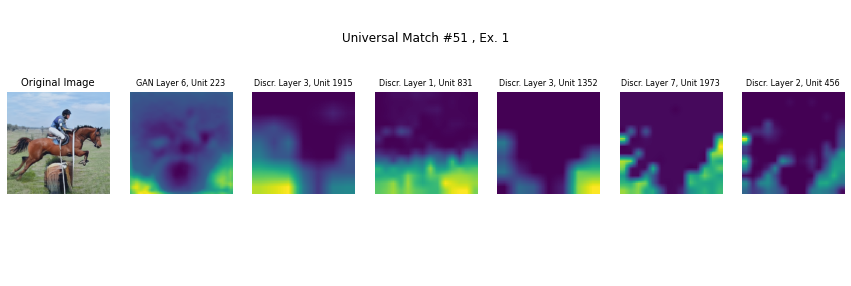

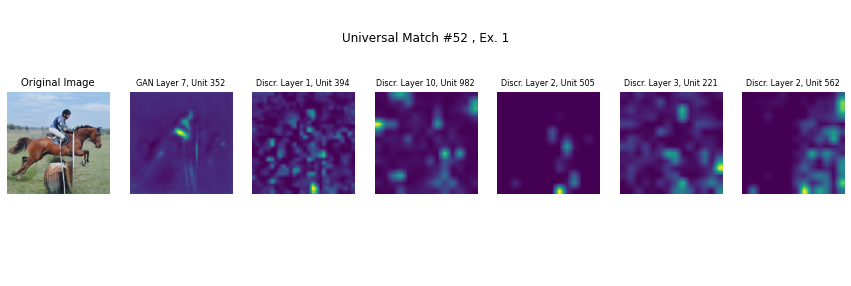

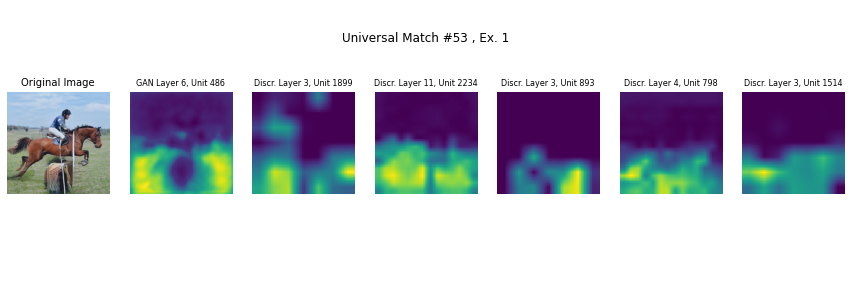

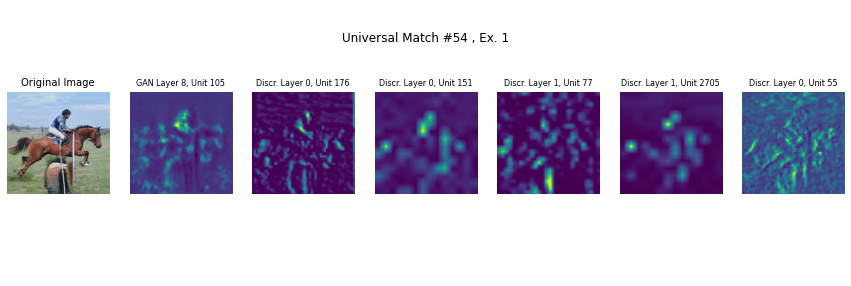

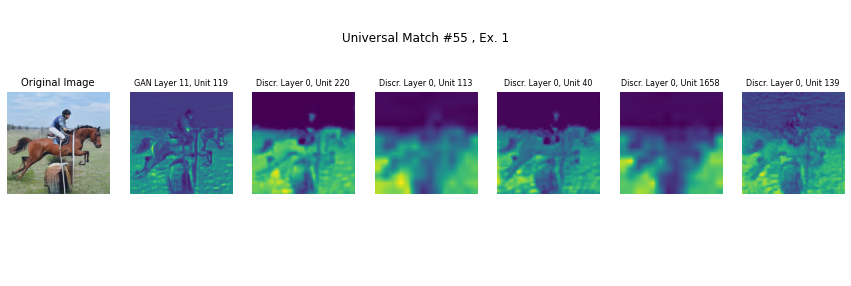

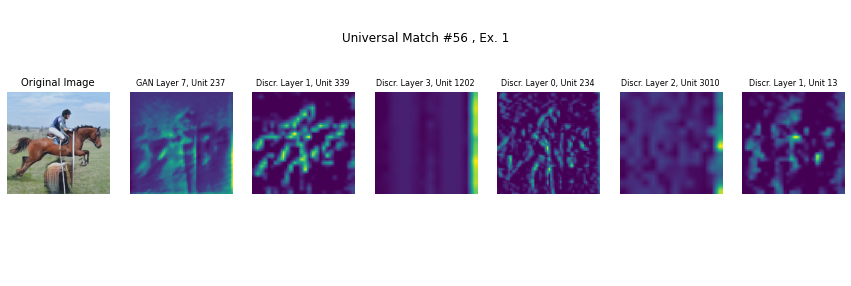

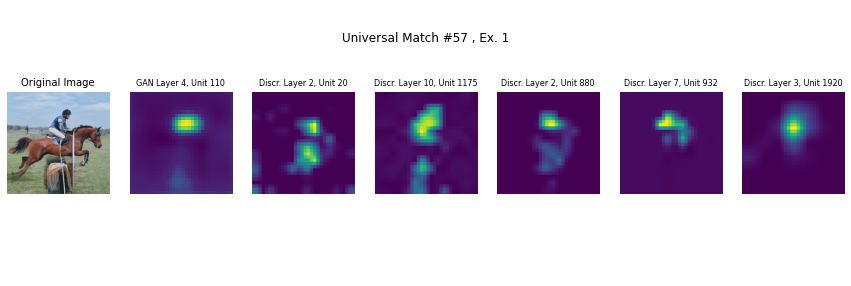

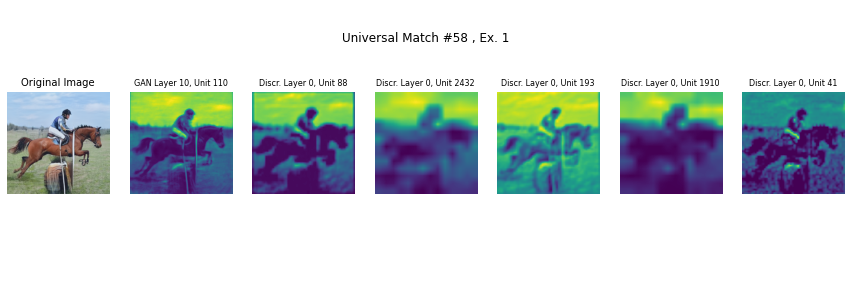

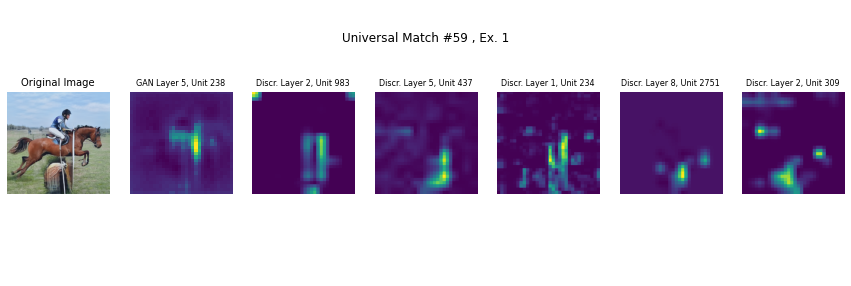

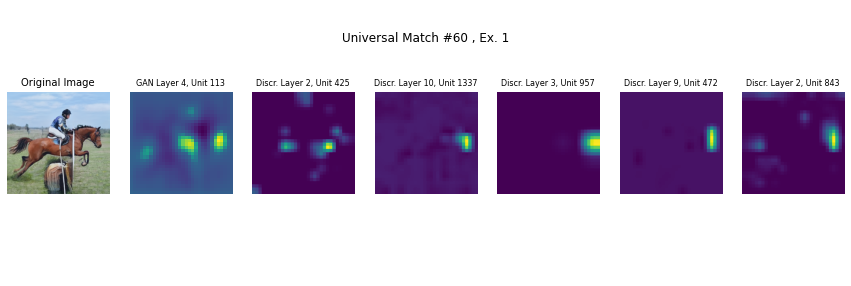

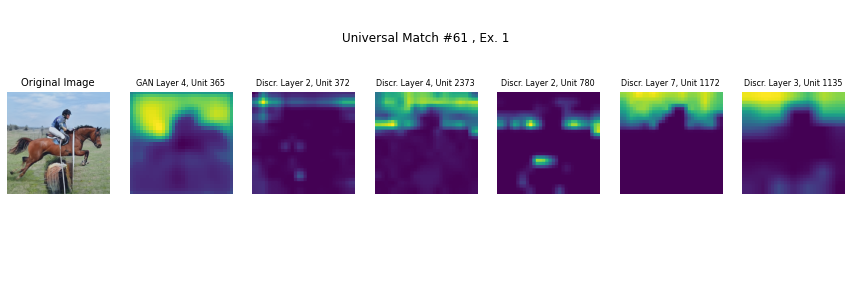

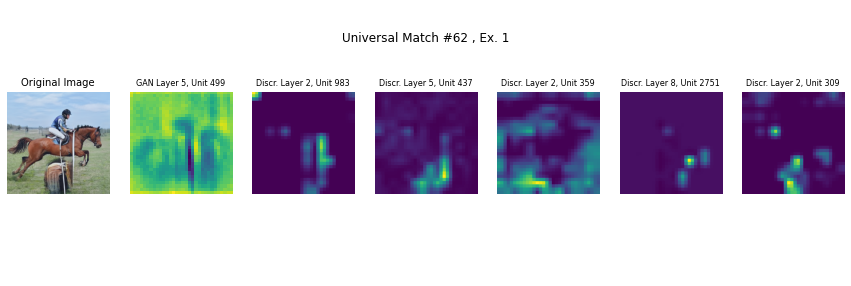

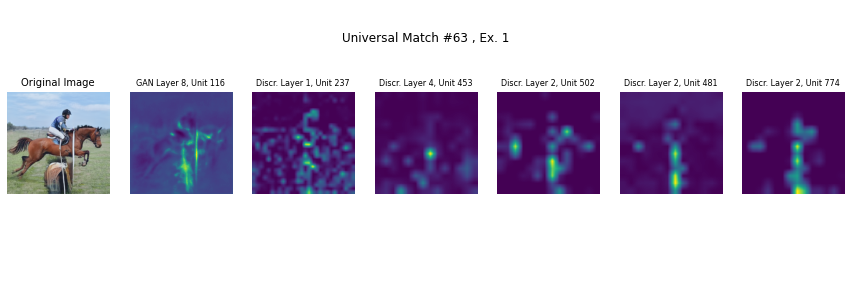

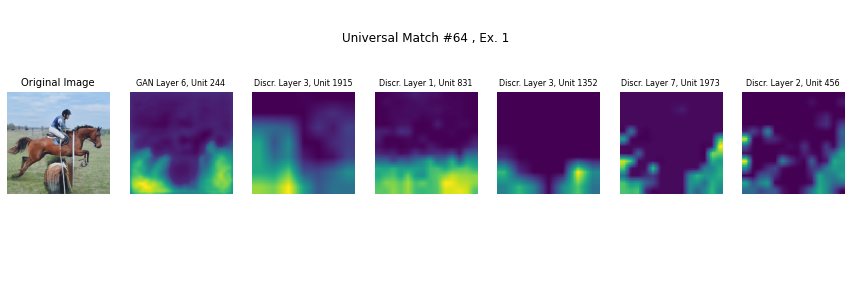

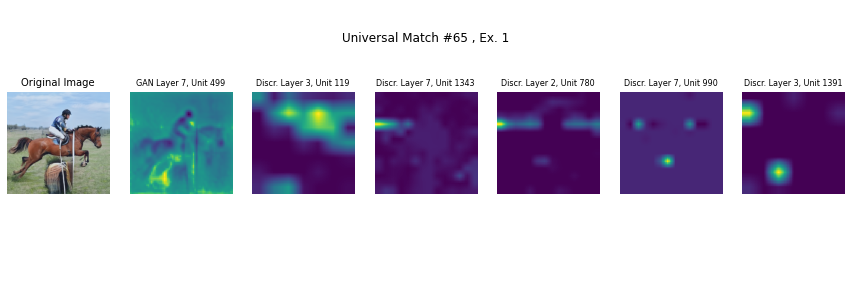

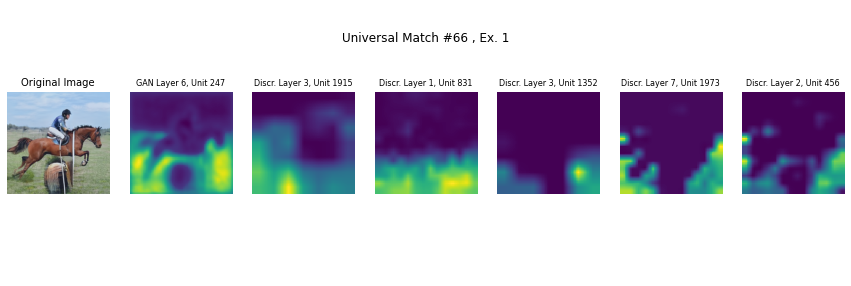

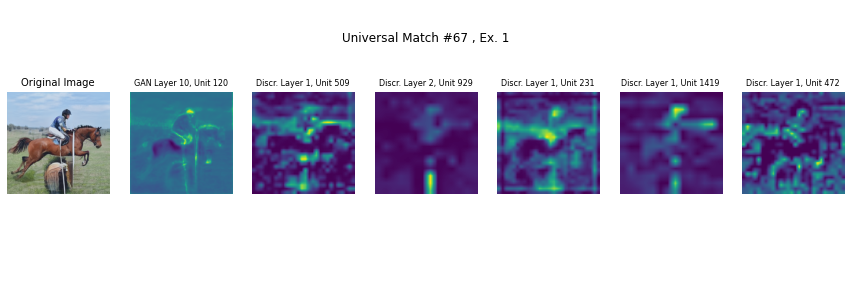

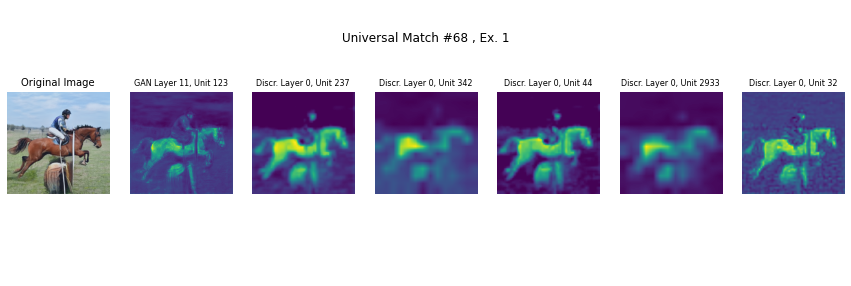

In [28]:
visualize_rosetta.viz_matches(gan,\
                            [resnet50, mae, dino, dinovit, clip],\
                            (z_dataset,c_dataset),\
                            ganlayers,\
                            [resnet50layers, maelayers, dinolayers, dinovitlayers, cliplayers],\
                            [gan1stats, gan2stats, gan3stats, gan4stats, gan5stats],\
                            [resnet50stats, maestats, dinostats, dinovitstats, clipstats],\
                            "stylegan2-lsun_horse", ["resnet50", "mae", "dino", "dino_vitb16", "clip"],\
                            universal_matches)